# Лекция 3. Основы Cтатистики ч.2

## Содержание
[3.1 Кластерный анализ методом k - средних](#3.1)  
[3.2 Может ли кластерный анализ "ошибаться"?](#3.2)  
[3.3 Как определить оптимальное число кластеров?](#3.3)   
[3.4 Иерархическая кластеризация](#3.4)  
[3.5 Введение в метод анализа главных компонент](#3.5)  

[Факторный анализ](#factor)



## 3.1 Кластерный анализ методом k - средних<a id='3.1'></a>

### Основные определения и тезисы:   
**Кластерный анализ** - анализирует наблюдения (по строкам). Определяет есть ли в данных группировка наблюдений по разным кластерам, а также сколько таких кластеров можно выделить.  

**Центроиды** - геометрические центры предполагаемых кластеров с координатами:  
[срeднее значение всех наблюдений кластера по оси X ; срeднее значение всех наблюдений кластера по оси Y]  

**Виды кластеризации**:  
* **k-means**  
Алгоритм:  
1) Решается на какое количество кластеров будут поделены наблюдения;  
2) Случайно выбираются начальные позиции центроидов кластера;  
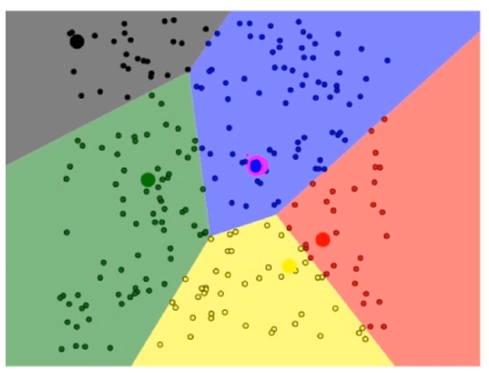  
3) Для каждого наблюдения определяется, к какому центроиду оно ближе всего;  
4) Обновляются позиции центроидов (среднее по каждой переменной для группы);  
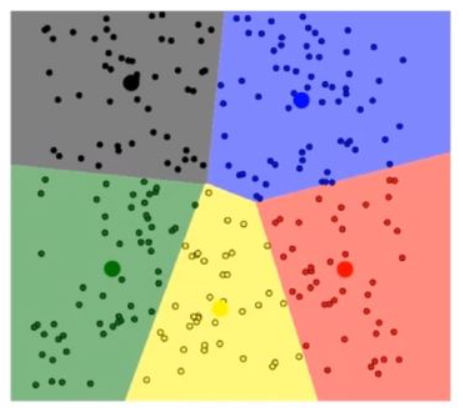  
5) Снова определяются принадлежности наблюдений(п.3). Если они изменились, то повторяется п. 4, иначе - алгоритм сошелся.  

* **Иерахическая кластеризация** [# глава 3.4](#3.4)  

**Анализ главных компонент(PCA)** - анализирует наблюдения (по столбцам). Используется для снижения размерности набора данных. Преобразовывет взаимосвязанные переменные в независимую переменную(главная компонента). [# глава 3.5](#3.5)  

### Примеры:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
""" Пример кластерного анализа на датасете iris """
iris_df = pd.read_csv("data_iris.csv", index_col=0)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


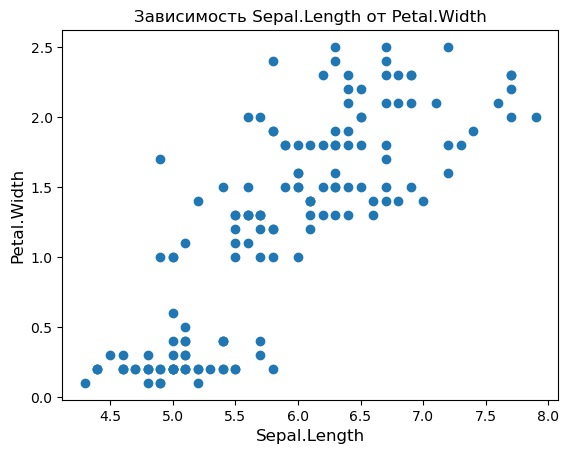

In [8]:
# визуализация данных
plt.title('Зависимость Sepal.Length от Petal.Width', fontsize=12)
plt.xlabel('Sepal.Length', fontsize=12)
plt.ylabel('Petal.Width', fontsize=12)

plt.scatter(iris_df["Sepal.Length"], iris_df["Petal.Width"])

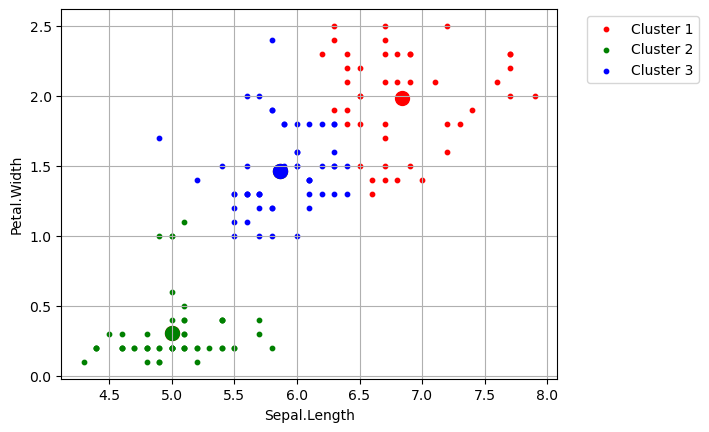

In [9]:
import warnings
warnings.filterwarnings('ignore')

# определяется количество кластеров 
clusters =('red', 'green', 'blue') # цвета для легенды графика
n_clusters = len(clusters)

# деление на кластеры
X = iris_df[["Sepal.Length", "Petal.Width"]].values
kmeans_model = KMeans(n_clusters=n_clusters, init ='k-means++', max_iter=300, n_init=10, random_state=42)
y= kmeans_model.fit_predict(X)

# визуализация групп и их центроидов
for i, color in enumerate(clusters):
    plt.scatter(X[y==i, 0], X[y==i, 1], s=10, c=color, label = f'Cluster {i+1}')
    plt.scatter(kmeans_model.cluster_centers_[i:, 0], kmeans_model.cluster_centers_[i:, 1], s=100, c=color)   
    
# заголовки
plt.xlabel("Sepal.Length")
plt.ylabel("Petal.Width")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()

Координаты центроида: (3.0, 5.0)


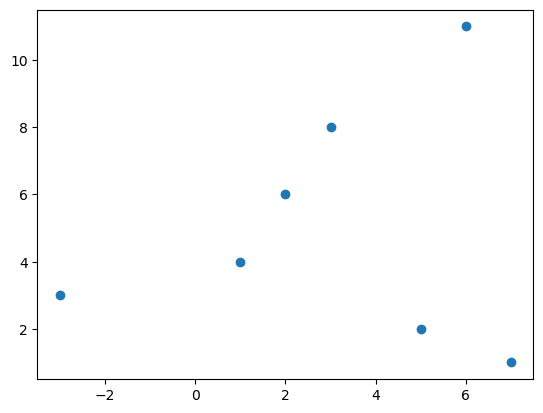

In [10]:
""" Рассмотрим пример данных, где каждое наблюдение характеризуется двумя переменными X и Y. 
    Рассчитайте координаты центроида наблюдений, изображенных на графике. 
    В поле для ответа введите координаты получившейся точки. """
x = [-3, 1, 2, 3, 5, 6, 7]
y = [3, 4, 6, 8, 2, 11, 1]
plt.scatter(x , y)

print(f"Координаты центроида: {np.mean(x),  np.mean(y)}")

## 3.2  k-means. Может ли кластерный анализ "ошибаться"?<a id="3.2"></a>

### Основные определения и тезисы:   
Поскольку в методе существует элемент случайности, при многократном повторении кластеризации на одних и тех же данных можно получить различные варианты кластерного решения. Чем менее явно представлена в данных кластерзация наблюдений, тем более существенными могут оказаться различия.  

Могут получиться и подобные решения:  
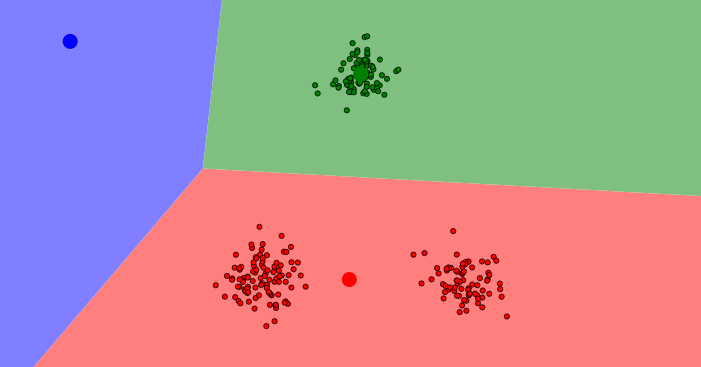  

**Решения, если метод сошелся "неудачно (алгоритм увяз в локальном минимуме)"**:  
1) Брать начальные точки наиболее далеко друг от друга;  
2) Провести кластерный анализ несколько раз с разными начальными позициями (Если каждый раз из разных случайных начальных положений центроидов, кластерный анализ приходит в одно и то же положение, скорее всего, это не случайно);  
3) Изменить количество центроидов.

## 3.3 k-means. Как определить оптимальное число кластеров?<a id = "3.3"></a>

### Основные определения и тезисы:   
**Внутригрупповая сумма квадратов(within-cluster sum of squares)** - сумма квадратов отклонений каждого наблюдения от центроида кластера.  

**Общая внутригрупповая сумма квадратов(total within-cluster sum of squares)** - сумма внутригрупповых сумм квадратов.  


Для того, чтобы выяснить, какое число кластеров оптимально, можно многократно проводить кластерный анализ. Каждый раз выделяя разное количество кластеров и записывая значение общей внутрикластерной суммы квадратов:  
* Если добавление одного кластера в данные **значительно понижает общую сумму квадратов**, то в увеличении числа кластеров есть смысл;  
* Если последующее увеличение кластеров уже **не оказывает сильного влияния**, значит оптимальное число кластеров найденно;  
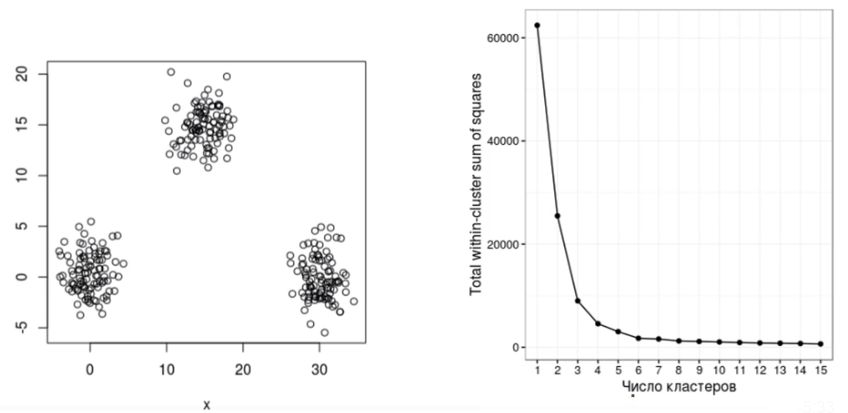  
* Если при увеличении числа кластеров идет **плавное снижение общей внтуригрупповой суммы квадратов**, значит в данных нет явной кластерной структуры.  
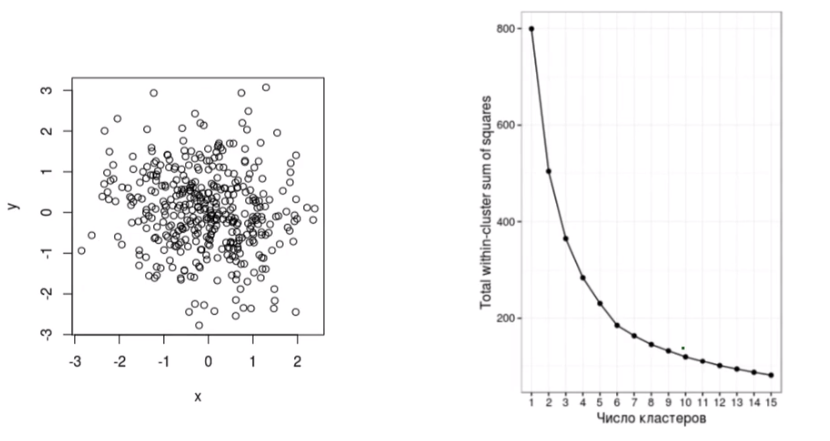  


### Примеры:  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

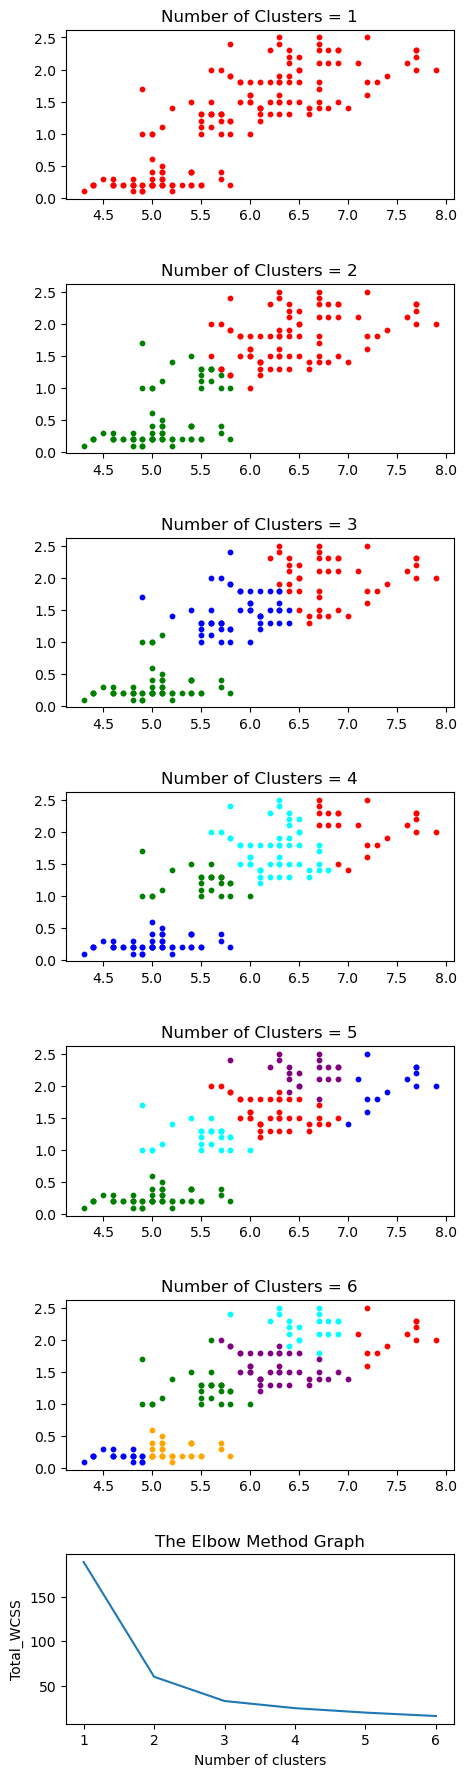

In [65]:
""" Визуализация изменения общей внутригрупповой суммы квадратов(WCSS) от количество кластеров """

import warnings
warnings.filterwarnings('ignore')

# данные
iris_df = pd.read_csv("data_iris.csv", index_col=0)
iris_df.head()

X = iris_df[["Sepal.Length", "Petal.Width"]].values

# количество кластеров 
n_clusters = 6
clusters =('red', 'green', 'blue', 'cyan', 'purple', 'orange') # цвета для кластеров

# подготовка "полотна"
fig, axes = plt.subplots(nrows=n_clusters, ncols=1, figsize=(5, 22))
plt.subplots_adjust(hspace=0.5)

total_wcss=[] # список полученных  WCSS
for i in range(1, n_clusters + 1): 
    # модель
    kmeans_model = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=42)
    kmeans_model.fit(X)
    # соотнесение по кластерам
    y = kmeans_model.labels_ 
    # общая внутригрупповая сумма квадратов
    total_wcss.append(kmeans_model.inertia_) 
    
    # график
    plt.subplot(n_clusters + 1, 1, i)   
    plt.title(f'Number of Clusters = {i}')
    
    for j, color in enumerate(clusters[:i]):
    # визуализация групп
        plt.scatter(X[y==j, 0], X[y==j, 1], s=10, c=color) 

# визуализация изменения WCSS от количество кластеров
plt.subplot(7, 1, n_clusters + 1)     
plt.plot(range(1, n_clusters+1), total_wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')
plt.show()

centroid = [3.0, 5.0]
WCSS = 146.0


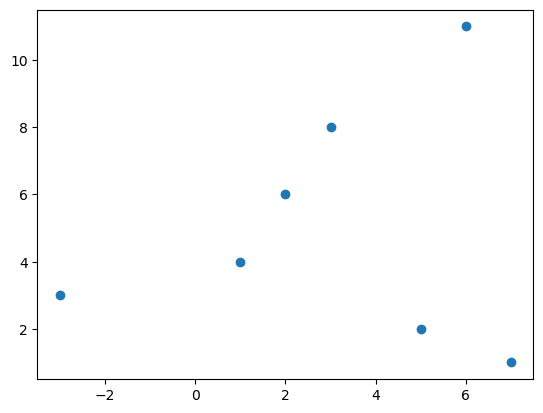

In [4]:
" Предположим, это один из кластеров в наших данных, тогда чему будет равняться внутрикластерная сумма квадратов? "
x = [-3, 1, 2, 3, 5, 6, 7]
y = [3, 4, 6, 8, 2, 11, 1]
plt.scatter(x , y)

c = [np.mean(x),  np.mean(y)] # центроид
wcss = [0 , 0]
for i in range(len(x)):
    wcss[0] += (x[i] - c[0])**2
    wcss[1] += (y[i] - c[1])**2
    
print("centroid =", c)
print("WCSS =",sum(wcss))

In [5]:
""" Рассчет через sklearn """
# координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
# Обучение модель KMeans на массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Вывод координат центроида данного кластера
print(kmeans.cluster_centers_)
# Вывод суммы квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0


_________________________________________________________________________________________________________________________
Сопоставьте графики рассеяния, показывающие связь двух переменных, и графики зависимости внутригрупповой суммы квадратов расстояний от количества кластеров для тех же данных.  

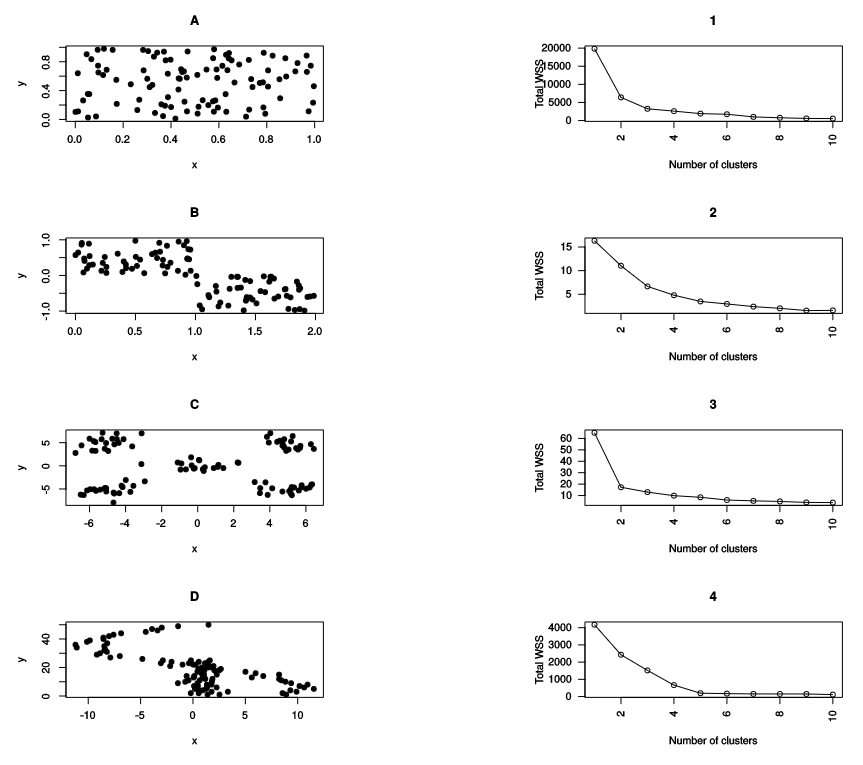  

**Ответ**:  
A - 2  
B - 3  
C - 4  
D - 1  

## 3.4 Иерархическая кластеризация<a id="3.4"></a>

### Основные определения и тезисы:   
**Алгоритм**:  
1) Рассчитывается расстояние между всеми наблюдениями (от каждого наблюдения высчитывается расстояние до всех остальных). Число кластеров = числу наблюдений;  
2) Производится кластеризация методами иереархической кластеризации, например:  
* **Метод одиночной связи (ближайшего соседа/kNearestNeighbor/kNN)** - в первую очередь объединяет самые близкие точки в кластер, заменяя их центроидом. Затем рассчитывает расстояния между получившимся центроидом и остальными наблюдениями и опять объединяет ближайшие точки;  
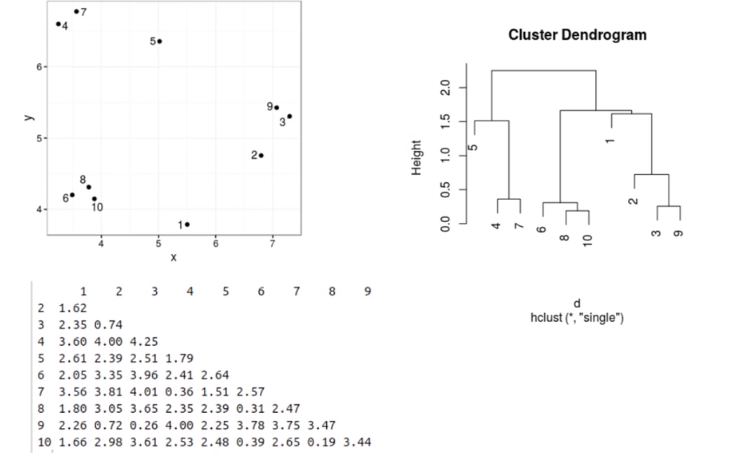  
* **Метод дальнего соседа** - в последнюю очередь объединяет самые близкие точки.
3) Кластеризация происходит до тех пор, пока все наблюдения не останутся в одном кластере.  

Методы иерархической кластеризации и k-средних можно комбинировать. Сначала применить метод иерархической кластеризации, оценить полученное количество веток, и использовать это число для метода k-средних.

### Примеры:   

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

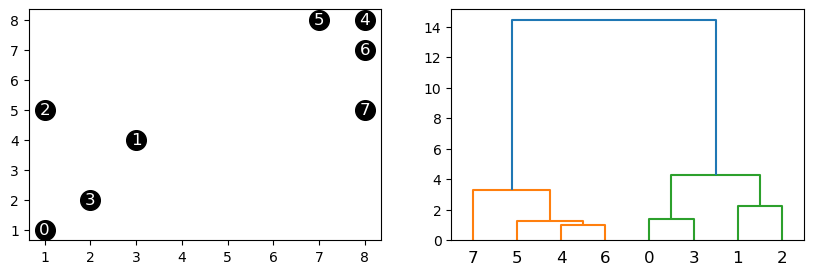

In [66]:
""" Пример работы kNN """

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
plt.subplots_adjust(hspace=0.5)

# данные
points = np.array([[1,1], [3,4], [1,5], [2,2], [8,8], [7,8], [8,7], [8,5]], dtype=float)
x, y = np.split(points, 2, axis=1)
labels = np.arange(0,8) # номер точек

# точки на графике
plt.subplot(1, 2, 1)
plt.scatter(x, y, s=200, c = "black") 
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, c="white", fontsize=12, ha='center', va='center')

# дендограмма кластеров
plt.subplot(1, 2, 2)
Z = linkage(points, 'ward')
dn = dendrogram(Z)

plt.show()

___________________________________________________________________________________________________________________
Соотнесите исходные данные и результаты иерархической кластеризации методом ближайшего соседа.  
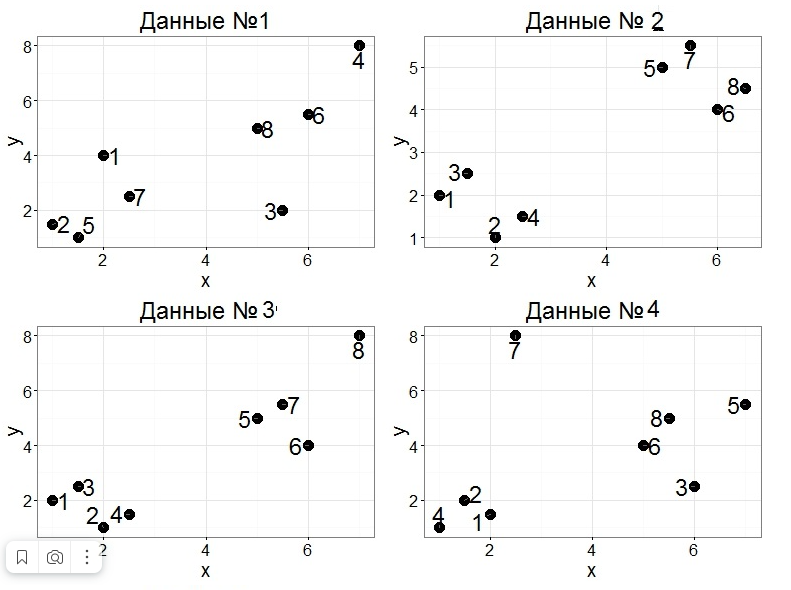  
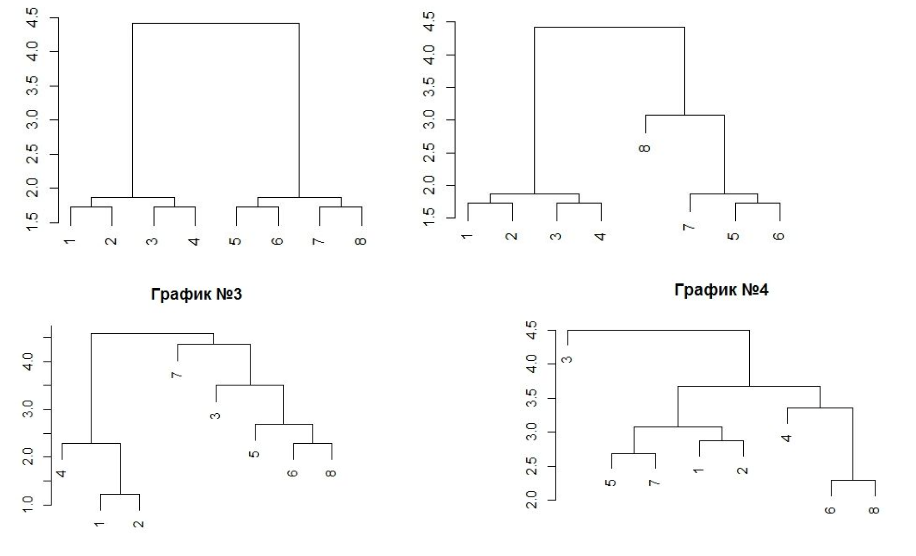  

**Ответ:**  
График №1 - Данные №2  
График №2 - Данные №3  
График №3 - Данные №4  
График №4 - Данные №1



## 3.5 Введение в метод анализа главных компонент<a id="3.5"></a>

### Основные определения и тезисы:   
**Метод анализа главных компонент (PCA, Principal Component Analysis)** -  это статистический метод, используемый для снижения размерности данных. Он позволяет выделить наиболее существенные переменные (главные компоненты), объясняющие наибольшую часть изменчивости в исходных данных. Изначальное(до сортировки) число главных компонент всегда равняется исходному числу переменных.  

**Алгортим анализа**:  
1) Подготовка данных: предварительная обработка, удаление выбросов, нормализация или стандартизация признаков;  
2) Вычисление ковариационной матрицы или корреляционной матрицы исходных признаков;  
3) Вычисление главных компонент: Главные компоненты вычисляются как линейные комбинации исходных переменных. Первая главная компонента объясняет наибольшую долю изменчивости(дисперсию) в данных, вторая компонента объясняет следующую по величине долю, и так далее;    
4) Сортировка собственных значений в порядке убывания и выбор наиболее информативных компонент.  
 
В случае сильной корреляции двух переменных, регрессионная прямая может стать **осью главной компоненты**(РС1). Тогда значения новой интегративной переменной - это проекция(расстояние) на ось РС1.  
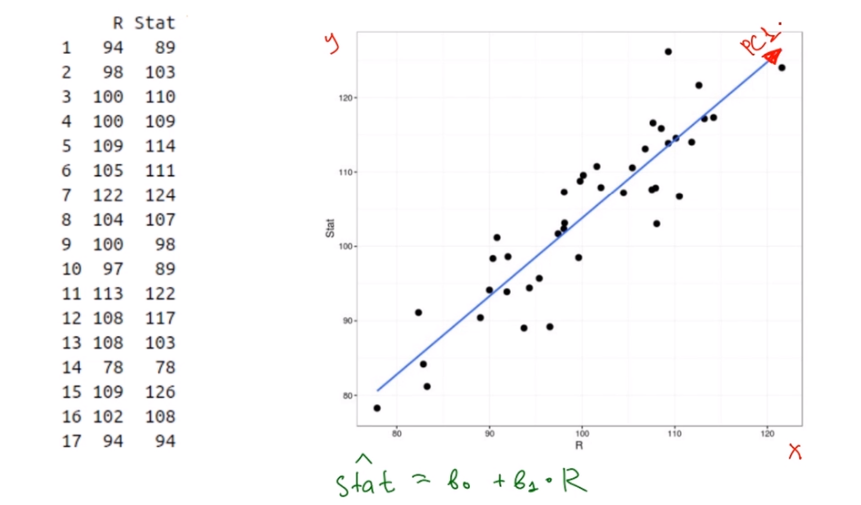  
Значения по оси РС1 - это значения корреляции м/у двумя переменными. Например, OX-рост OY-вес, тогда РС1-конституция тела. Если значение PC1 близко к максимуму, то это означает что значения по росту и весу тоже значительно. А уменьшение значения PC1 - означает одновременное уменьшение роста и веса.  

Чем сильнее корреляция между переменными, тем меньше информации потеряется. При этом "знак" отклонения не учитывается, т.е. зная только значение по оси РС1 мы не можем знать, в какую сторону от регрессионной прямой отклоняется предсказанное наблюдение.  

Информация об отклонении предсказанного значения хранится в оси РС2 (во второй компоненте) - перпендикуляру оси РС1.  
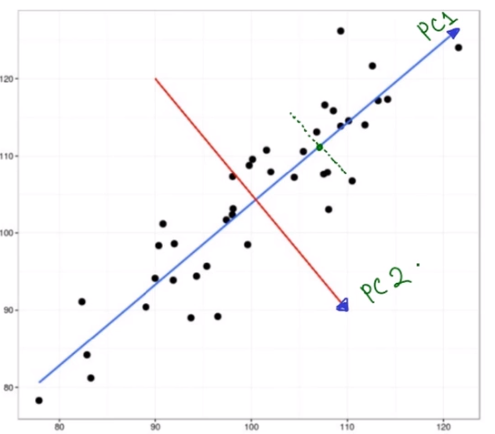   

Информация по оси РС2 увеличивает процент объяснённой дисперсии всего на 4.5%, что позволяет не учитывать эту информацию.  
Таким образом, корреляционная прямая(РС1), становится одной новой переменной (интегративной переменной) вместо двух переменных по осям OX и OY. Что позволяет снизить размерность данных.  
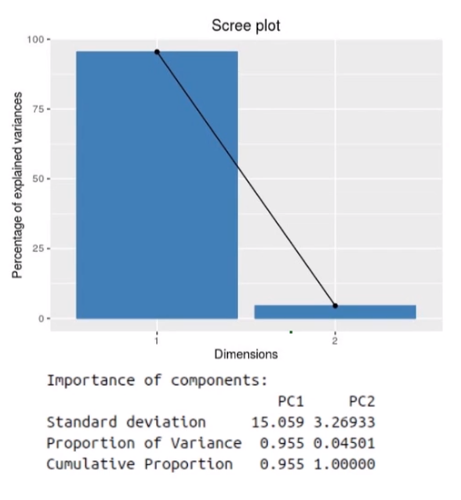  


Если на графике biplot угол между переменными равен 90 градусов, значит коэффициент корреляции межу ними равняется нулю. Если угол - тупой, то корреляция отрицательная.  
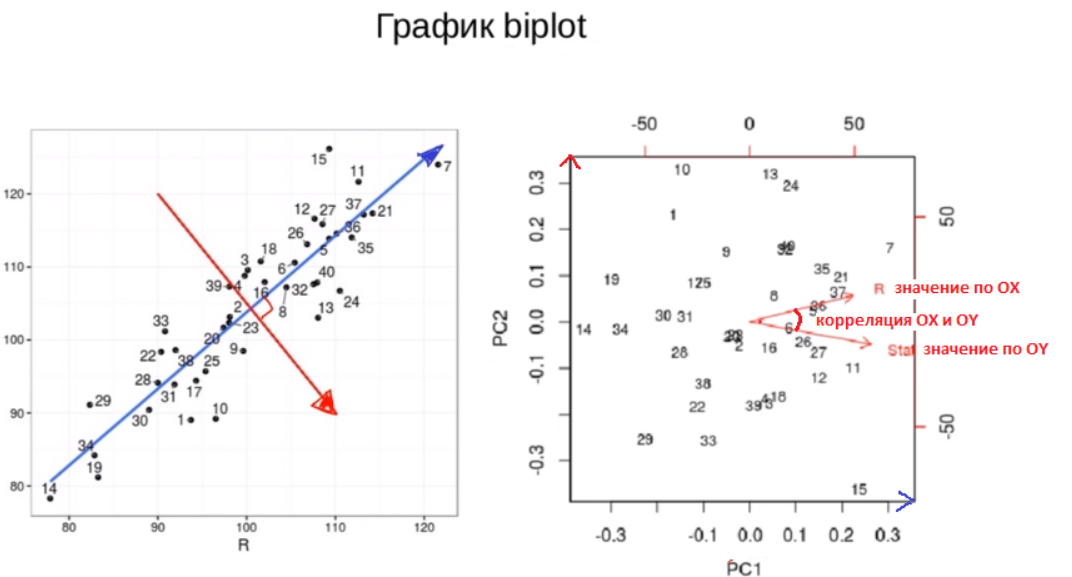  

После формирования первой компоненты(PC1), можно избавиться от переменных R и stat. При этом потеряется около 4.5% информации (исходной изменчивости). 
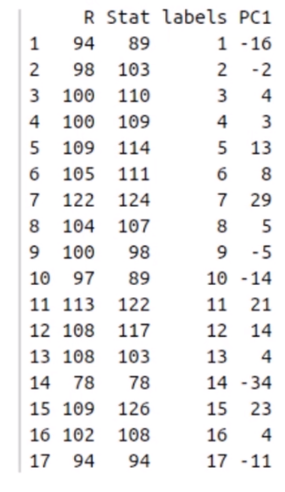  

### Примеры:  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pip install pca
from pca import pca

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


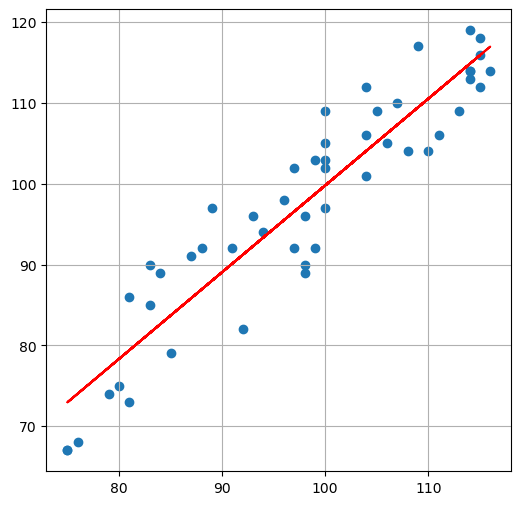

In [7]:
""" Реализация PCA с двумя переменными с помощью библиотеки pca"""
# генерация линейной зависимости оценок
random_df = pd.DataFrame()
random_df["R"] = np.random.randint(75,120,50)
random_df["stat"] = [elem + np.random.randint(-10,10) for elem in random_df["R"]]

# диаграмма рассеивания 
plt.figure(figsize=(6, 6))
plt.scatter(random_df["R"], random_df["stat"])

# регрессионная прямая
b1, b0 = np.polyfit(random_df["R"], random_df["stat"], 1) #  b0 - intercept, b1 - slope
plt.plot(random_df["R"], b0 + b1*random_df["R"], color='red')
plt.grid()
plt.show()

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


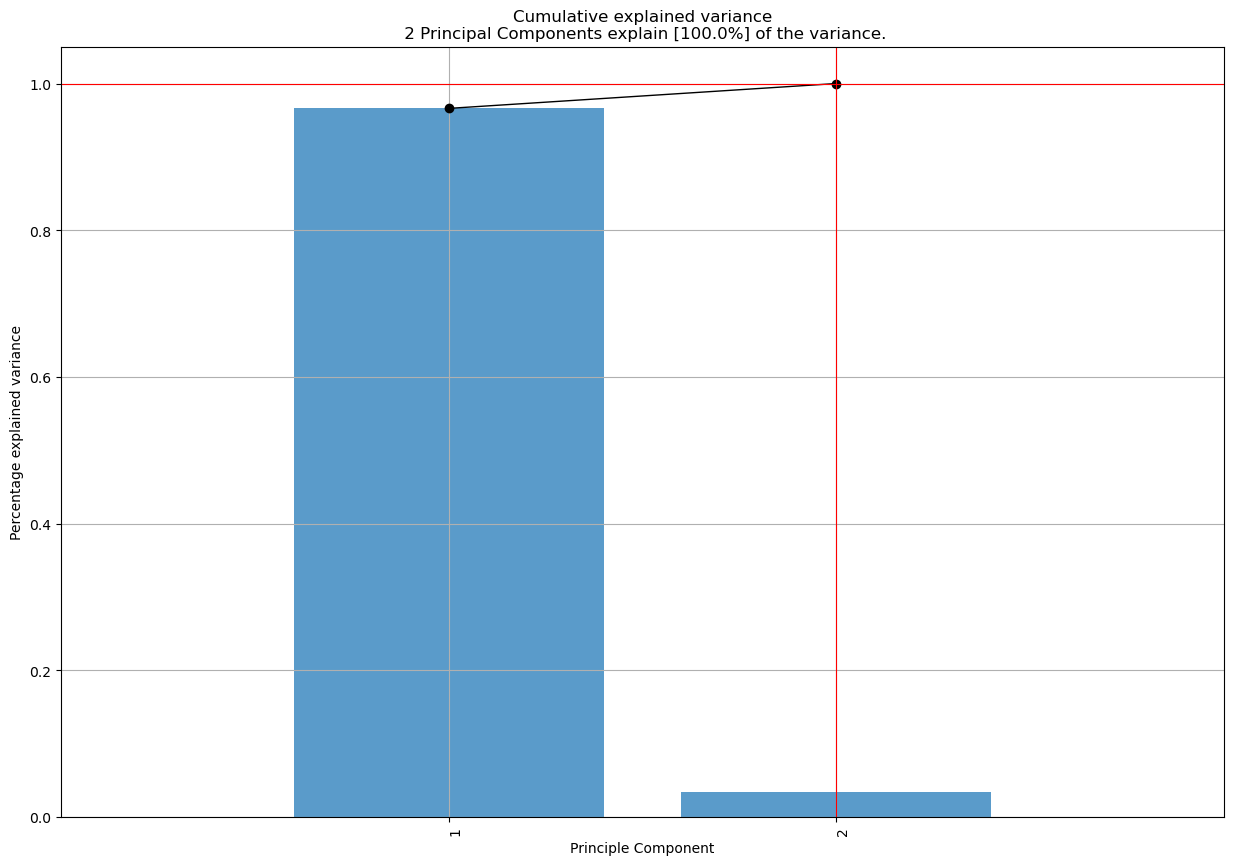

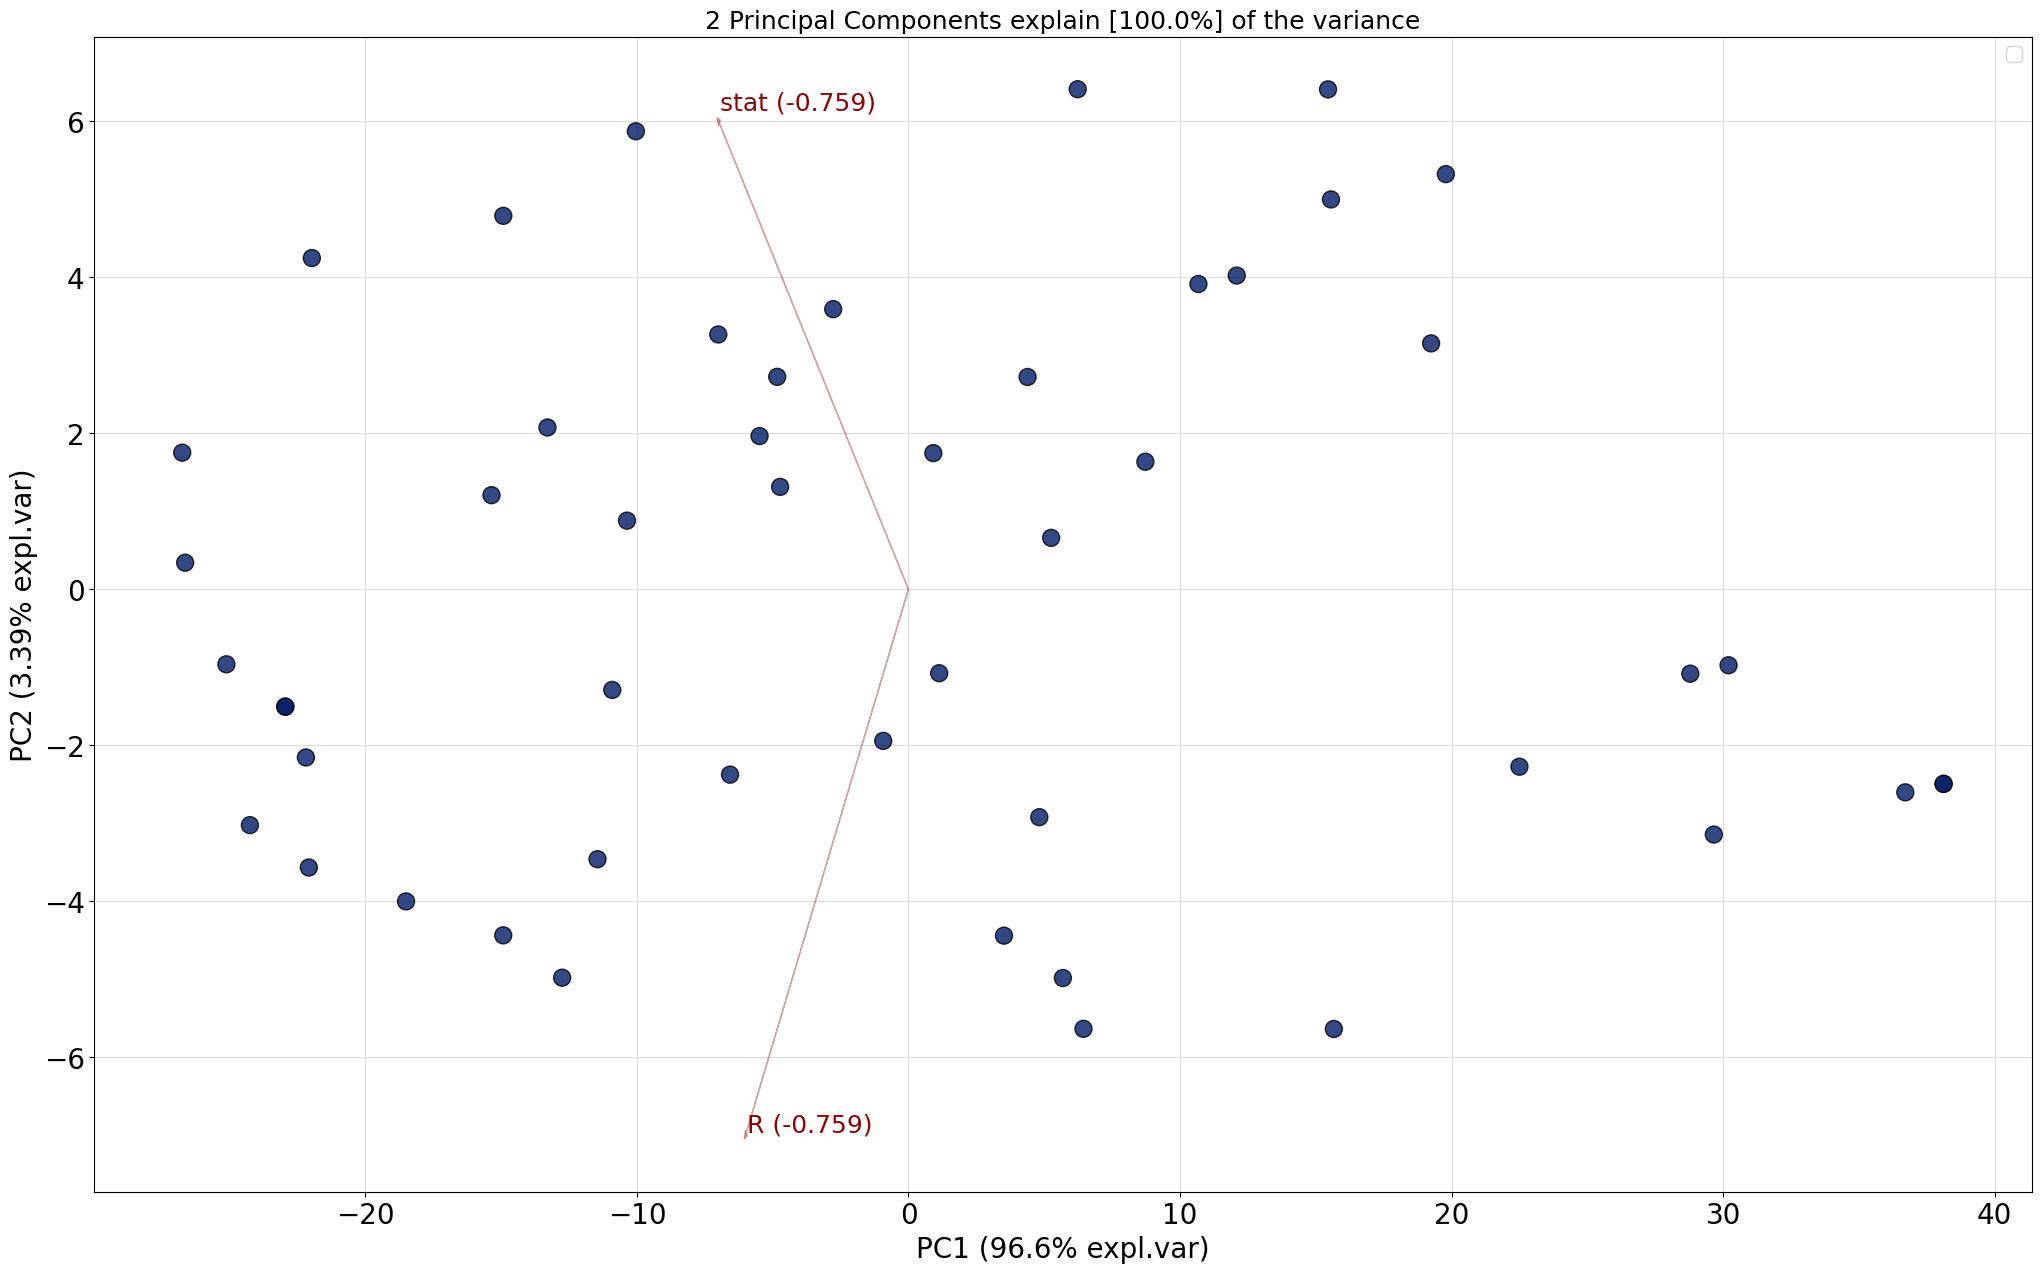

In [8]:
features = ['R', 'stat']
X = random_df[features]

# модель PCA с 2-мя компонентами
model = pca(n_components=2)
results = model.fit_transform(X)

# столбчатая диаграмма
fig, ax = model.plot()

# диаграмма рассеивания с новыми координатами
fig, ax = model.biplot(n_feat=2)
plt.show()

In [5]:
""" Реализация PCA с несколькими переменными с помощью sklearn и plotly """
# данные
swiss_df = pd.read_csv("data_swiss.csv", index_col = 0)
# задание интересующих переменных (тут заданы все переменные)
features = swiss_df.columns 
X = swiss_df[features]

# модель
skpca = PCA(n_components=len(features))
components = skpca.fit_transform(X)
loadings = skpca.components_.T * np.sqrt(skpca.explained_variance_)
exp_var_cumul = np.cumsum(skpca.explained_variance_ratio_)


# График зависимости объясненной изменчивости от количества главных компонент
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Главные компоненты", "y": "Объясненная изменчивость"})

# По графику видно, что 2 главные компоненты объясняют почти 93% изменчивости данных

In [6]:
# график biplot
fig = px.scatter(components, x=0, y=1, text=swiss_df.index)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top")
    
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5)

fig.show()

_____________________________________________________________________________________________________________________________
Ярослав построил график biplot, на котором на осях нанесены значения двух первых главных компонент, а также отмечены наблюдения и исходные переменные. Какие выводы мы можем сделать, основываясь на этом графике?  
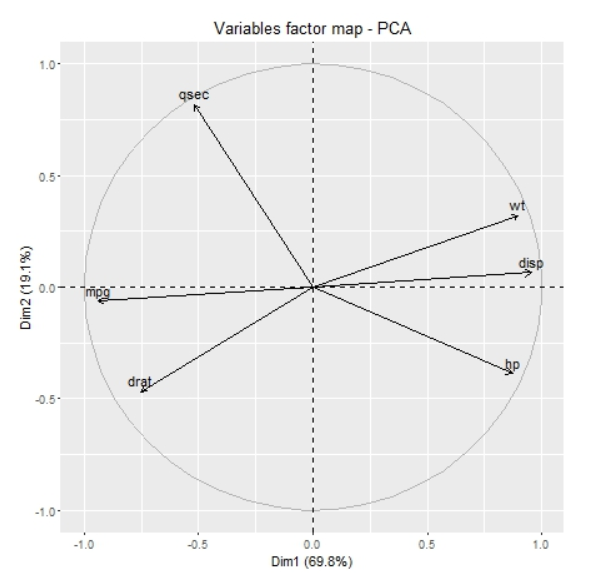  
* Первая главная компонента объясняет большую часть изменчивости, чем вторая главная компонента.  
* Переменные wt и drat взаимосвязаны отрицательно.  
* Переменные wt и disp взаимосвязаны положительно.  
* Значения первой главной компоненты в большей степени определяют значения переменных mpg, disp, hp, drat и wt. Значения второй главной компоненты в большей степени определяют значения переменной qseс.  
_____________________________________________________________________________________________________________________________
Проинтерпретировав график biplot, Ярослав понял, что мы можем весьма осмысленно описать наши исходные данные, используя только две главные компоненты вместо шести исходных переменных.   

Но перед тем как принять решение, какое число главных компонент выбрать для описания исходных данных, имеет смысл взглянуть на взаимосвязь числа компонент и объясненной изменчивости в данных. На графике представлен процент изменчивости, который объясняет каждая из шести главных компонент, а также сводка о кумулятивном проценте объясненной изменчивости.  
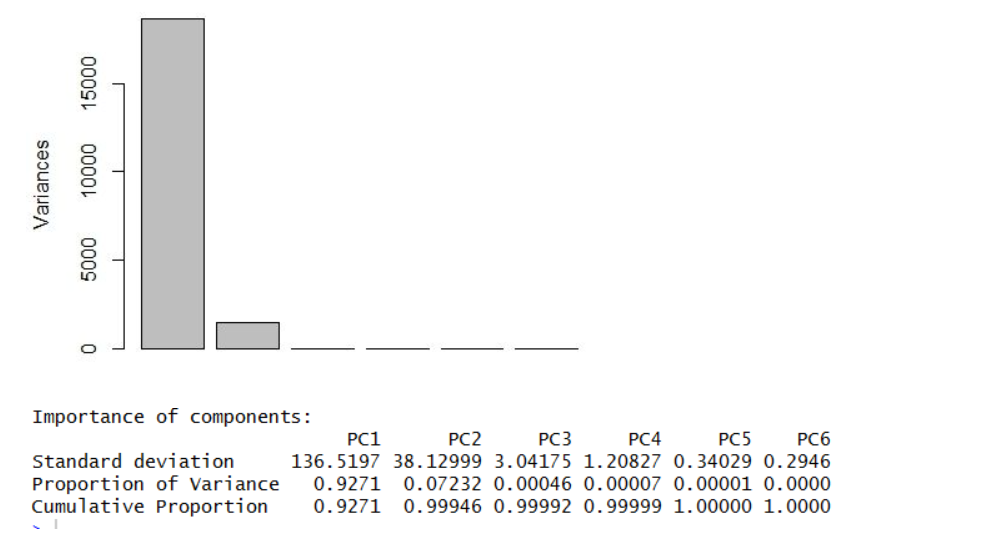  
* Для описания исходных данных можно смело использовать две главные компоненты, так как они объясняют 99 процентов изменчивости исходных данных.  

## Факторный анализ<a id="factor"></a>

Факторный анализ - метод понижения размерности данных. Идея метода заключается в том, что возможно некоторые переменные могут быть сгруппированы в факторы. Фактор - это некоторая латентная переменная, которая объединяет исходные переменные в данных.  

Например, если бы в нашей выборке каждый испытуемый характеризовался весом, ростом, силой, знаем английского, знанием немецкого и знанием русского языка. То вероятно, мы смогли бы выделить два фактора: "физическая подготовка" и "знание языков". Разумеется, первые три определяли бы первый фактор, а оставшиеся переменные - второй  фактор.  

Давайте посмотрим на основные результаты факторного анализа, примененного к нашим данным swiss для того, чтобы выделить два фактора:  
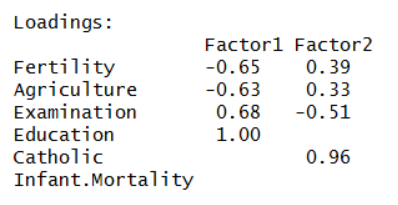  

Основные результаты факторного анализа - это факторные нагрузки для каждой переменной. Проводя аналогии с анализом главных компонент, мы можем выяснить какие переменные в большей степени взаимосвязаны между собой и влияют на значения первого фактора, а какие переменные напротив группируются друг с другом и влияют на второй фактор.  

В данной таблице видно, что первый фактор - это низкие значения по переменной Fertility, Agriculture но высокие значения переменных Examination и Education. Второй фактор - это наоборот высокие значения по переменным  Fertility, Agriculture, низкие по переменной Examination и максимальный вклад вносит переменная Catholic - то есть процент католического населения.  

Таким образом, можно предположить, что за факторизацию наших переменных отвечает два фактора - преобладание протестантского или католического населения.  